# Linear Regression Assignment

--By Arjun Mehtani


## The followings steps would be performed in this assignment - 

- Reading/Understanding the data
- Data Cleaning / Performing EDA
- Data preparation for modelling ( Train-Test-split ,  etc)
- Training the model
- Performing residual analysis
- Predictions/evaluations of test set


In [1]:
#Importing important libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#Importing important libraries for sklearn

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


#Importing important statsmodels

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading/Understanding the data

In [2]:
#Loading/reading the data--
a=pd.read_csv('day.csv') #day.csv file was loaded using read_csv from pandas library
a.head(20) #displaying first 20 rows to see the initial dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


We can see that <b>cnt</b> which is the target variable in our case is a continuous variable hence we can perform regression.

In [3]:
#Lets get more information about our dataset

In [4]:
a.shape

(730, 16)

In [5]:
#We can conclude that there are 730 rows and 16 columns in the data set

In [6]:
#Lets see the statistical summary of numerical variables
a.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#lets check the column datatypes and non nulls count
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#checking the nulls in the data set
a.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# we found that there are no null values in the data set

# Data Cleaning / Performing EDA

#### After going through the data dictionary

##### I found some important points

-  yr : year (0: 2018, 1:2019)

   mnth : month ( 1 to 12)
   
   dteday : date
   
   Hence we can remove dteday as we have month and year in different columns 
   

- casual: count of casual users

  registered: count of registered users
  
  cnt: count of total rental bikes including both casual and registered
  
  Hence we can remove casual and registered as we are getting the total from cnt
  
  
- Also Column instant is like S.No. hence its not required for our analysis


In [10]:
#Dropping columns which are not required for our analysis

In [11]:
a.drop('dteday',axis=1,inplace=True) #dropping dteday

In [12]:
a.drop('casual',axis=1,inplace=True) #dropping casual

In [13]:
a.drop('registered',axis=1,inplace=True) #dropping registered

In [14]:
a.drop('instant',axis=1,inplace=True) #dropping instant

In [15]:
#lets see the final data set
a.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#Checking the shape of the dataset again
a.shape 

(730, 12)

In [17]:
#we can clearly see that the column count has reduced to 12

### According to the problem statement and the data dictionary --

Some of the variables like 'weathersit' , 'season' , etc have values as 1, 2, 3, 4 which have specific labels associated with them.
We need to convert these variables into categorical string values

The following variables need to be converted into categorical string values----
I would be converting the variables in the following way-
- weathersit : 
		- 1: Clear
		- 2: Mist_Cloudy
		- 3: LSnow_LRain_Thunder
		- 4: HRain_Ice_Thunder_Fog
        
- season : 
        - 1:spring
        - 2:summer
        - 3:fall
        - 4:winter
        
- mnth : 1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
        9:'September',10:'October',11:'November',12:'December'
         
- weekday : 1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'

In [18]:
#Applying the above logic on specific categorical columns

In [19]:
a.weathersit.replace({1:'Clear',2:'Mist_Cloudy',3:'LSnow_LRain_Thunder',4:'HRain_Ice_Thunder_Fog'},inplace=True)

In [20]:
a.mnth.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)

In [21]:
a.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)

In [22]:
a.weekday.replace({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'},inplace=True)

In [23]:
#The basic idea is to convert Yes/No type variables into 0/1 and other categorical variable into dummy varibles

In [24]:
#Lets look at the data now

In [25]:
a.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,January,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,January,0,Sunday,0,Mist_Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,January,0,Monday,1,Mist_Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,January,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,January,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


### Now we can note tht we have 3 type of columns in our dataset -

- Continuous
- Categorical
- Binary

In [26]:
#Lets visualize the numerical variables now

In [27]:
a.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Univariate Analysis --

In [28]:
#temp

<AxesSubplot:xlabel='temp'>

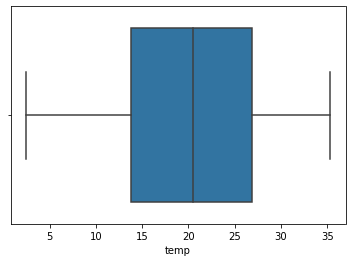

In [29]:
sns.boxplot(a.temp) #no outliers detected

In [30]:
#atemp

<AxesSubplot:xlabel='atemp'>

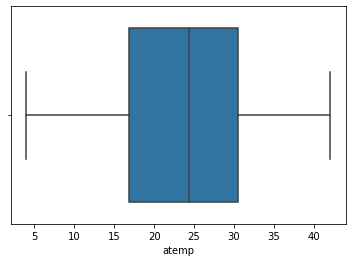

In [31]:
sns.boxplot(a.atemp) #no outliers detected

In [32]:
#hum

<AxesSubplot:xlabel='hum'>

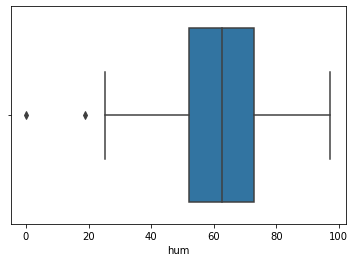

In [33]:
sns.boxplot(a.hum) #we see 2 outliers

<AxesSubplot:xlabel='windspeed'>

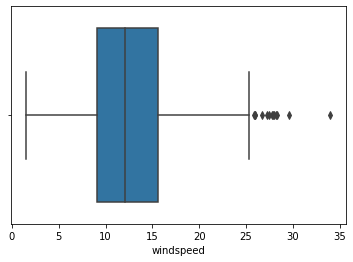

In [34]:
#windspeed
sns.boxplot(a.windspeed) #outliers detected between 25 and 35

<AxesSubplot:xlabel='cnt'>

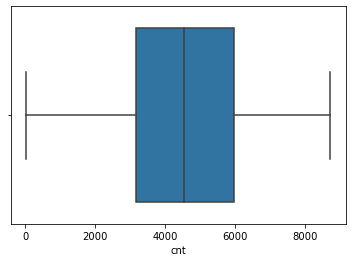

In [35]:
#cnt
sns.boxplot(a.cnt) #no outliers detected

In [36]:
#Lets visualize all categorical variables one by one-----

In [37]:
#season
a.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

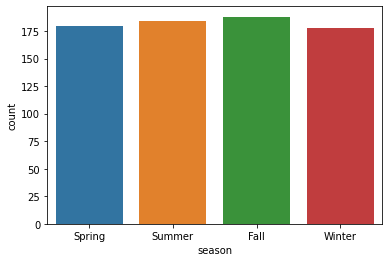

In [38]:
sns.countplot(a["season"])
#We see that the count is highest for fall

In [39]:
#yr
a.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

<AxesSubplot:xlabel='yr', ylabel='count'>

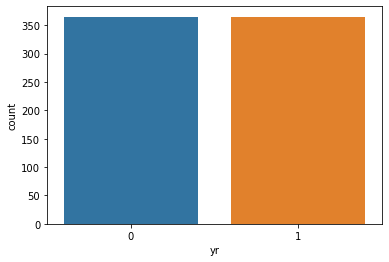

In [40]:
sns.countplot(a["yr"])
#We can see that count of both the years is exactly same

In [41]:
#holiday
a.holiday.value_counts()
#We can see that more Bikes were rented during regular day

0    709
1     21
Name: holiday, dtype: int64

<AxesSubplot:xlabel='holiday', ylabel='count'>

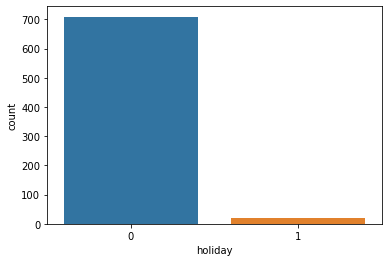

In [42]:
sns.countplot(a.holiday)

In [43]:
#weathersit
a.weathersit.value_counts()

Clear                  463
Mist_Cloudy            246
LSnow_LRain_Thunder     21
Name: weathersit, dtype: int64

<AxesSubplot:xlabel='weathersit', ylabel='count'>

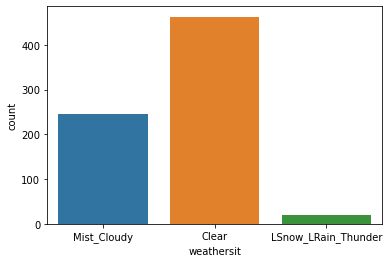

In [44]:
sns.countplot(a.weathersit)
#We can clearly see that highest number of bikes rented were during clear weathersit

In [45]:
#one important point to note here is that we are not getting 'HRain_Ice_Thunder_Fog' 
#hence while creating dummy variable we dont need to remove the first column value as one column is already missing

### Bivariate / Multivariate analysis --

In [46]:
#lets plot scatter plots to get a more clear picture

In [47]:
#we know that workingday and holiday are binary categorical variables 
#represented by 0,1 hence we will visualize it with categorical variables

<Figure size 1440x720 with 0 Axes>

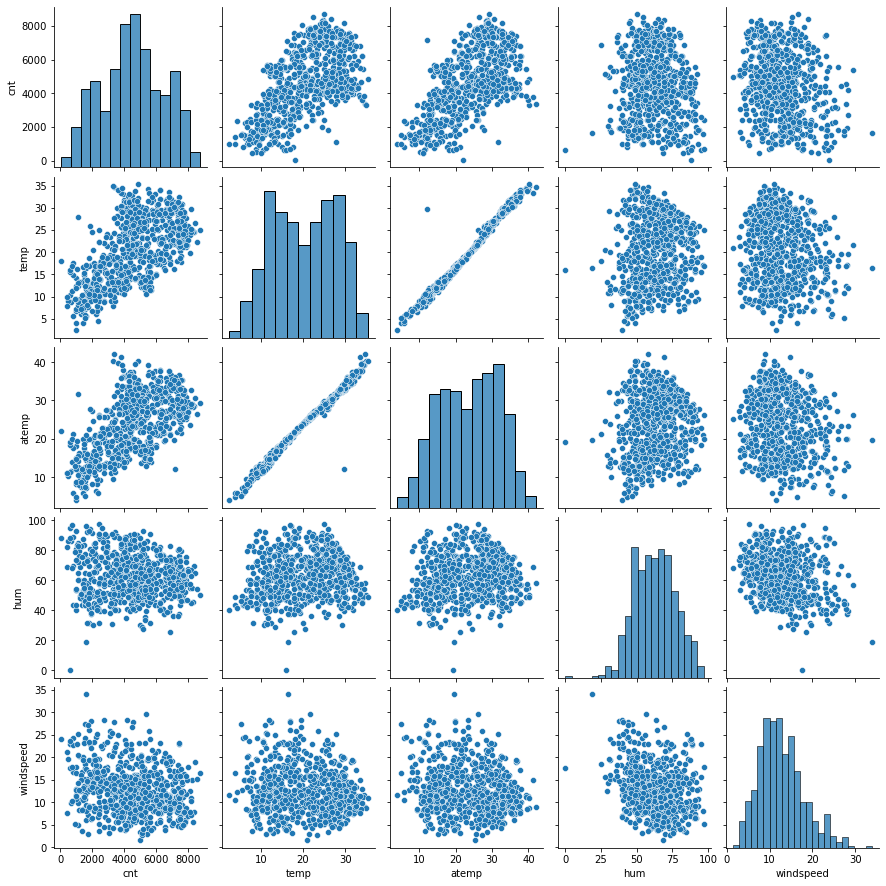

In [48]:
plt.figure(figsize=(20,10))
sns.pairplot(a[['cnt','temp','atemp','hum','windspeed']])

<AxesSubplot:>

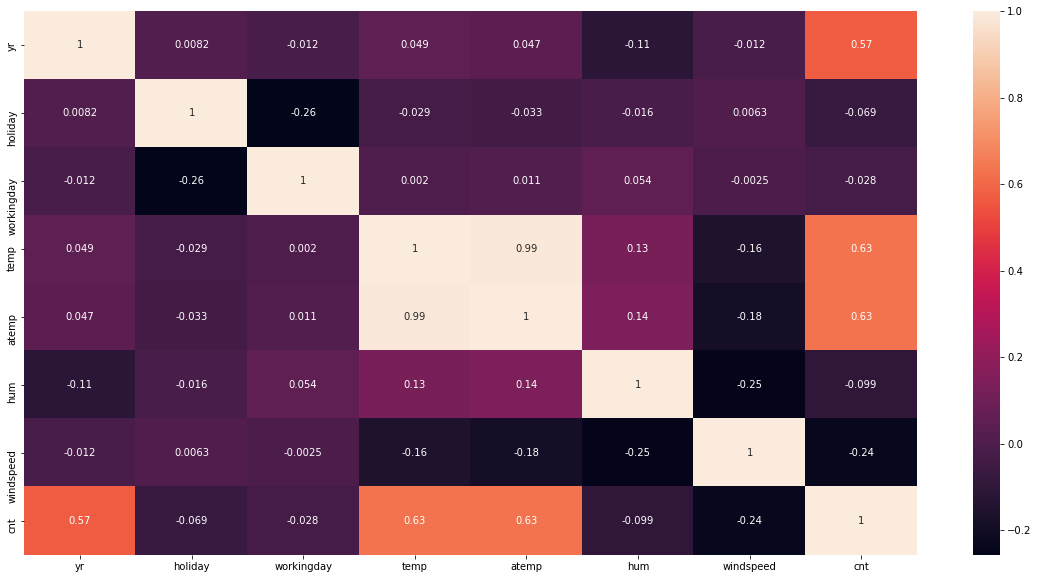

In [49]:
# Lets plot a heatmap for better understanding ---
plt.figure(figsize=(20,10))
sns.heatmap(a.corr() , annot=True)

In [50]:
#The first question is that whether it makes sense to do linear regression or not

#We can clearly see that there are variables like temp and atemp which have a linear correlation with cnt
#hence we can perform linear regression

#One more thing to note is that temp and atemp are highly correlated hence we can take only one during our modelling to avoid multicollinearity

### Lets annalyze all numerical variables against 'cnt' -- (target)

Text(0.5, 1.0, 'cnt vs temp')

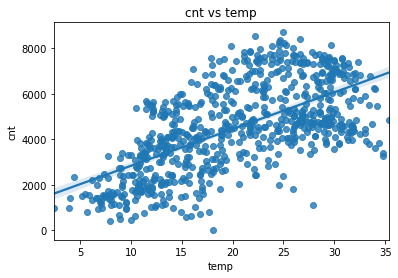

In [51]:
#temp
sns.regplot(x='temp',y='cnt',data=a)
plt.title('cnt vs temp')
#We can observe a linear relation

Text(0.5, 1.0, 'cnt vs atemp')

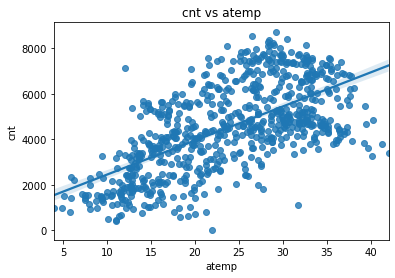

In [52]:
#atemp
sns.regplot(x='atemp',y='cnt',data=a)
plt.title('cnt vs atemp')
#We can observe a linear relation

Text(0.5, 1.0, 'cnt vs hum')

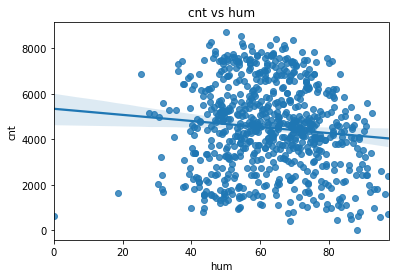

In [53]:
#hum
sns.regplot(x='hum',y='cnt',data=a)
plt.title('cnt vs hum')
#Cant find any particular relation
#we can observe a negative correlation for hum i.e - As hum increases cnt decreases 

Text(0.5, 1.0, 'cnt vs windspeed')

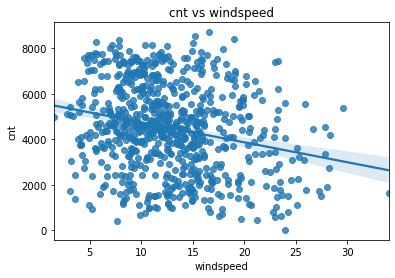

In [54]:
#windspeed
sns.regplot(x='windspeed',y='cnt',data=a)
plt.title('cnt vs windspeed')
#Cant find any particular relation
#we can observe a negative correlation of windspeed i.e - As windspeed increases cnt decreases 

In [55]:
#Lets visualize the categorical variables with target variable

In [56]:
a[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,Spring,0,January,0,Monday,1,Mist_Cloudy
1,Spring,0,January,0,Tuesday,1,Mist_Cloudy
2,Spring,0,January,0,Wednesday,1,Clear
3,Spring,0,January,0,Thursday,1,Clear
4,Spring,0,January,0,Friday,1,Clear
...,...,...,...,...,...,...,...
725,Spring,1,December,0,Friday,1,Mist_Cloudy
726,Spring,1,December,0,Saturday,0,Mist_Cloudy
727,Spring,1,December,0,Sunday,0,Mist_Cloudy
728,Spring,1,December,0,Monday,1,Clear


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

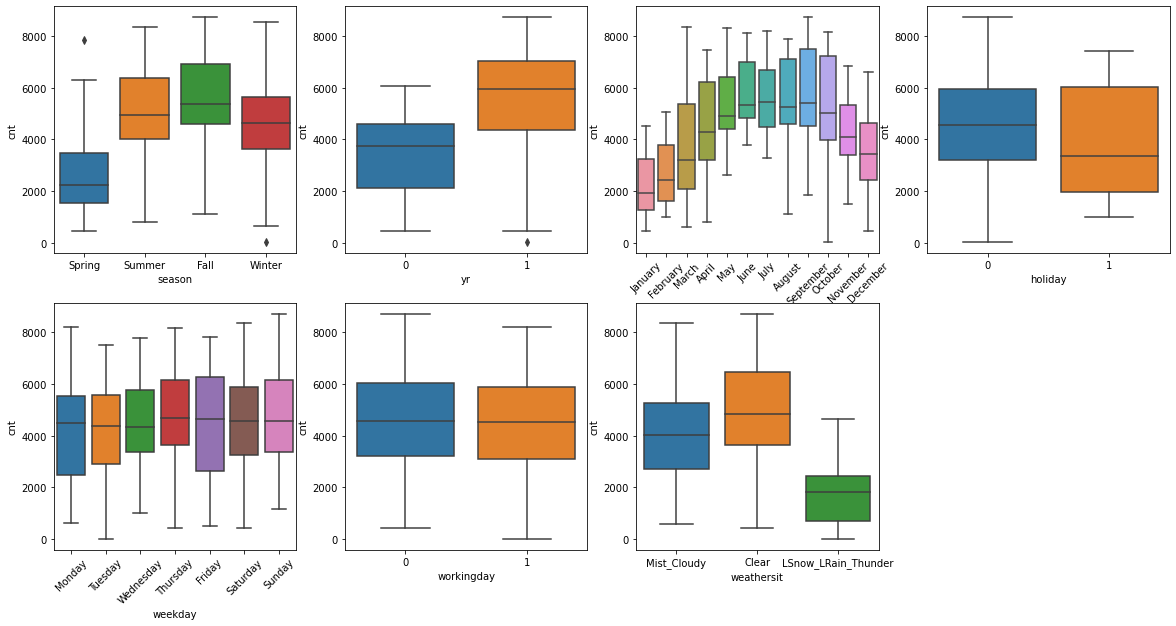

In [57]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt' , data=a)
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt' , data=a)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt' , data=a)
plt.xticks(rotation=45)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt' , data=a)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt' , data=a)
plt.xticks(rotation=45)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt' , data=a)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt' , data=a)

#### Inferences--

- We can observe that the most no. of bike rentals are during Fall
- The no. of bike rentals has increased from 2018 to 2019
- More no. of bike rentals are during workdays and lesser on holidays
- More no of bike rentals are during clear weather
- It can be also observed that the count of bike rentals have increased every month with peak during september

### Preparation of Data

In [58]:
#We can observe that most of the (yes/no) binary categorical variables are in the form of 0 and 1
#hence we dont need to change that
#For other binary variables where categorical levels are more that 2 , we need to create dummy variables
#The main idea is to convert all the categorical variables to numeric representation so that they can be fetched to the model.

In [59]:
a

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,December,0,Friday,1,Mist_Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,December,0,Saturday,0,Mist_Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,December,0,Sunday,0,Mist_Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,December,0,Monday,1,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [60]:
# Creating Dummy Variables ---
#As we had already seen that we will not drop first for 'weathersit' as the value will be lost

a=pd.get_dummies(data=a,columns=["season","mnth","weekday"],drop_first=True)

In [61]:
a=pd.get_dummies(data=a,columns=['weathersit'])

In [62]:
a.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_LSnow_LRain_Thunder,weathersit_Mist_Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# Data Preparation for modelling

### Splitting Data into train and test dataset

In [63]:
a_train,a_test= train_test_split(a,train_size=0.7,random_state=100)

In [64]:
print(a_train.shape)
print(a_test.shape)

(510, 31)
(220, 31)


In [65]:
#we can see that train and test have been divinded accordingly.

## Rescaling the features

In [66]:
a_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_LSnow_LRain_Thunder,weathersit_Mist_Cloudy
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,1,0,0,0,0,0,1


In [67]:
#It is extremely important to rescale the variables so that they have a comparable scale

In [68]:
#Using pre-built min-max scalar from sklearn

In [69]:
#Instantiating the object

scaler_obj=MinMaxScaler()

#we dont need to rescale all the variables , only the required numeric variables
numeric_vars= ['temp','atemp','hum','windspeed','cnt']

a_train[numeric_vars] = scaler_obj.fit_transform(a_train[numeric_vars])

In [70]:
a_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_LSnow_LRain_Thunder,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,0,0,0,1


In [71]:
a_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_LSnow_LRain_Thunder,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#now we can observe that max value for all the variables is 1

# Training the model

In [73]:
a_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Clear',
       'weathersit_LSnow_LRain_Thunder', 'weathersit_Mist_Cloudy'],
      dtype='object')

### As there are many columns in the dataset we would go with Balanced approach (Automated + Manual)

In [74]:
y_train=a_train.pop('cnt')
X_train=a_train

In [75]:
X_train.head() #Independent variables

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_LSnow_LRain_Thunder,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [76]:
y_train.head() #Target variable

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [77]:
lm=LinearRegression() #creating model instance

In [78]:
#passing model instance to RFE
rfe= RFE(lm,15) #randomly selecting 15 features
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [79]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 11),
 ('mnth_December', False, 2),
 ('mnth_February', False, 3),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 16),
 ('mnth_May', False, 10),
 ('mnth_November', True, 1),
 ('mnth_October', False, 14),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 6),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Clear', True, 1),
 ('weathersit_LSnow_LRain_Thunder', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [80]:
#columns marked as 1 are selected

In [81]:
#Columns selected by RFE 

col= X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weathersit_Clear',
       'weathersit_LSnow_LRain_Thunder', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [82]:
#columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

# Building model using stats model approach
- note - we use stats model to get detailed stats summary

In [83]:
# taking only the RFE selected variables
X_train_rfe = X_train[col]

In [84]:
X_train_rfe = sm.add_constant(X_train_rfe) #Adding constant in case of stats model

In [85]:
X_train_rfe

,const,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Clear,weathersit_LSnow_LRain_Thunder,weathersit_Mist_Cloudy
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,1,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,0,0,1
79,1.0,0,0,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,0,1


In [86]:
#Manual Elimination approach ---->We need to build model again and again and also need to calculate VIF again and again
#Hence to avoid redundancy lets make a function to build the model and a function to calculate VIF

In [87]:
#function to build the model and display the statistical summary
def build_lr_model(X_train_rfe):
    lm = sm.OLS(y_train,X_train_rfe).fit()
    print(lm.summary())


#function to calculate VIF and display it
def calculate_VIF(X_train_rfe):
    vif_a = pd.DataFrame()
    X_a = X_train_rfe
    X_a = X_a.drop(['const'], axis=1)
    vif_a['Features'] = X_a.columns
    vif_a['VIF'] = [variance_inflation_factor(X_a.values, j) for j in range(X_a.shape[1])]
    vif_a['VIF'] = round(vif_a['VIF'], 2)
    vif_a = vif_a.sort_values(by = "VIF", ascending = False)
    print(vif_a)

### First Model

In [88]:
build_lr_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.41e-189
Time:                        17:15:42   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [89]:
calculate_VIF(X_train_rfe)

                          Features    VIF
12                weathersit_Clear  49.00
14          weathersit_Mist_Cloudy  32.49
5                    season_Spring   5.20
13  weathersit_LSnow_LRain_Thunder   4.16
2                             temp   3.97
7                    season_Winter   3.76
6                    season_Summer   2.68
3                              hum   1.90
8                     mnth_January   1.57
9                        mnth_July   1.49
10                   mnth_November   1.49
11                  mnth_September   1.31
4                        windspeed   1.21
0                               yr   1.04
1                          holiday   1.03


In [90]:
# We will remove mnth_November as the p value is very high

In [91]:
X_train_rfe = X_train_rfe.drop(["mnth_November"], axis = 1)

In [92]:
#Building the model again

### Building Second Model

In [93]:
build_lr_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.59e-190
Time:                        17:15:42   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [94]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_rfe)

                          Features    VIF
11                weathersit_Clear  48.01
13          weathersit_Mist_Cloudy  31.97
5                    season_Spring   5.08
12  weathersit_LSnow_LRain_Thunder   4.13
2                             temp   3.89
7                    season_Winter   3.59
6                    season_Summer   2.65
3                              hum   1.90
8                     mnth_January   1.57
9                        mnth_July   1.49
10                  mnth_September   1.30
4                        windspeed   1.21
0                               yr   1.04
1                          holiday   1.02


In [95]:
# We will remove mnth_January as the p value is very high

In [96]:
X_train_rfe = X_train_rfe.drop(["mnth_January"], axis = 1)

In [97]:
#building the model again

### Building third model

In [98]:
build_lr_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.95e-190
Time:                        17:15:42   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [99]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_rfe)

                          Features    VIF
10                weathersit_Clear  46.52
12          weathersit_Mist_Cloudy  31.14
5                    season_Spring   5.02
11  weathersit_LSnow_LRain_Thunder   4.08
2                             temp   3.61
7                    season_Winter   3.48
6                    season_Summer   2.62
3                              hum   1.89
8                        mnth_July   1.48
9                   mnth_September   1.30
4                        windspeed   1.19
0                               yr   1.03
1                          holiday   1.02


In [100]:
# We will remove season_Spring as the p value is slightly high

In [101]:
X_train_rfe = X_train_rfe.drop(["season_Spring"], axis = 1)

In [102]:
#building the model again

### Building Fourth model

In [103]:
build_lr_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.89e-190
Time:                        17:15:42   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [104]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_rfe)

                          Features    VIF
9                 weathersit_Clear  28.13
11          weathersit_Mist_Cloudy  21.83
10  weathersit_LSnow_LRain_Thunder   3.36
3                              hum   1.87
2                             temp   1.60
7                        mnth_July   1.43
5                    season_Summer   1.33
6                    season_Winter   1.29
8                   mnth_September   1.19
4                        windspeed   1.18
0                               yr   1.03
1                          holiday   1.02


In [105]:
# We will remove mnth_July as the p value is slightly high

In [106]:
X_train_rfe = X_train_rfe.drop(["mnth_July"], axis = 1)

In [107]:
#building the model again

### Building Fifth Model

In [108]:
build_lr_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.32e-189
Time:                        17:15:43   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [109]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_rfe)

                          Features    VIF
8                 weathersit_Clear  28.13
10          weathersit_Mist_Cloudy  21.83
9   weathersit_LSnow_LRain_Thunder   3.36
3                              hum   1.86
2                             temp   1.27
6                    season_Winter   1.25
5                    season_Summer   1.19
4                        windspeed   1.18
7                   mnth_September   1.11
0                               yr   1.03
1                          holiday   1.02


In [110]:
#removing weathersit_Clear due to high VIF

In [111]:
X_train_rfe = X_train_rfe.drop(["weathersit_Clear"], axis = 1)

In [112]:
#building the model again

### Building sixth Model

In [113]:
build_lr_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.32e-189
Time:                        17:15:43   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [114]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_rfe)

                         Features    VIF
3                             hum  14.25
2                            temp   8.01
4                       windspeed   3.56
9          weathersit_Mist_Cloudy   2.11
0                              yr   2.01
6                   season_Winter   1.66
5                   season_Summer   1.58
7                  mnth_September   1.21
8  weathersit_LSnow_LRain_Thunder   1.16
1                         holiday   1.04


In [115]:
#removing hum as the VIF value is high

In [116]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [117]:
#building the model again

### Building seventh Model

In [118]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.83e-186
Time:                        17:15:43   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [119]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_rfe)

                         Features   VIF
2                            temp  3.68
3                       windspeed  3.06
0                              yr  2.00
4                   season_Summer  1.57
8          weathersit_Mist_Cloudy  1.48
5                   season_Winter  1.37
6                  mnth_September  1.20
7  weathersit_LSnow_LRain_Thunder  1.08
1                         holiday  1.04


In [120]:
#now we can observe that all the columns are significant and the VIF are less than 5

### This can be our final model

### Final Model Coefficient and their values --

const                              0.1259      
yr                                 0.2329      
holiday                           -0.0987      
temp                               0.5480     
windspeed                         -0.1532      
season_Summer                      0.0881      
season_Winter                      0.1293      
mnth_September                     0.1012      
weathersit_LSnow_LRain_Thunder    -0.2829      
weathersit_Mist_Cloudy            -0.0784

### Equation ---

#### cnt= 0.1259 + (0.2329 * yr) - (0.0987 * holiday) + (0.5480 * temp) - (0.1532 * windspeed) + (0.0881 * season_Summer) + (0.1293 * season_Winter) + (0.1012 * mnth_September) - ( 0.2829 * weathersit_LSnow_LRain_Thunder) - (0.0784 * weathersit_Mist_Cloudy)

### Significant variables --

yr  

holiday

temp

windspeed                              

season_Summer                        

season_Winter                         

mnth_September

weathersit_LSnow_LRain_Thunder      

weathersit_Mist_Cloudy            

# Residual Analysis 

In [121]:
y_train_pred = lm.predict(X_train_rfe)

In [122]:
res=y_train-y_train_pred

Text(0.5, 1.0, 'Residual analysis')

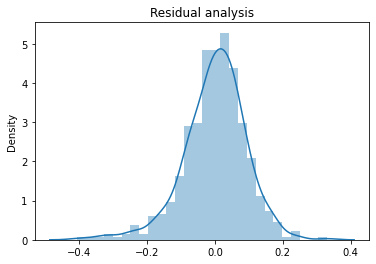

In [123]:
sns.distplot(res)
plt.title('Residual analysis')

In [124]:
#We can see that errors are having a normal distribution with mean at 0.0

# Testing the model

In [125]:
#Transfoming test data set
a_test[numeric_vars] = scaler_obj.transform(a_test[numeric_vars])

In [126]:
#dividing into X_test and y_test

In [127]:
y_test = a_test.pop('cnt')
X_test = a_test

In [128]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_September', 'weathersit_LSnow_LRain_Thunder',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [129]:
X_train_new = X_train_rfe.drop(['const'], axis=1) 

In [130]:
# Creating X_test_new dataframe 
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [131]:
#checking the head for test dataset
X_test_new.head()

,const,yr,holiday,temp,windspeed,season_Summer,season_Winter,mnth_September,weathersit_LSnow_LRain_Thunder,weathersit_Mist_Cloudy
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [132]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

In [133]:
#Calculating r2 score for test dataset
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7941977535477243

In [134]:
#we can cleary observe that the R2 score of the test dataset is very close to the R2 score calculated on the train dataset
#this confirms that our model is working fine

Text(0.5, 1.0, 'y_test_pred vs y_test')

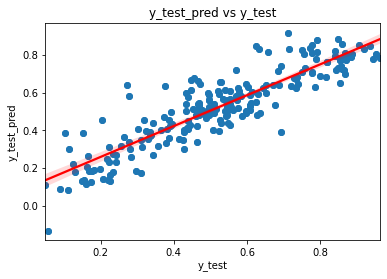

In [135]:
plt.scatter(y_test,y_test_pred)
sns.regplot(x= y_test,y= y_test_pred , line_kws={"color": "red" })
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('y_test_pred vs y_test')

In [136]:
#we can observe that the variance of error terms is constant (homoscedasticity) - assumption of linear regression fulfilled

# Final Insights ----    

### 1) The factors affecting the demand for these shared bikes in American market are -

yr

holiday

temp

windspeed

season_Summer

season_Winter

mnth_September

weathersit_LSnow_LRain_Thunder

weathersit_Mist_Cloudy


### 2) Inferences -

- After the situation gets better the company should try to expand during the month of september as the highest count was at that time.

- Moreover the company should refrain from expanding the business during Light Snow or Light Rain/Thunder as it can impact the business.

- It is also found that as the temperature increases the count of rental bikes also increased.

- From the above analysis it is also observed the demand of rental bikes has increased from 2018 to 2019 , hence there is a huge possibility of it to increase next year as well.